<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/Collab---v-3.8/notebooks/T2%20-%202%20-%20Data%20Cleaning%20-%20Funciones%20de%20distribuci%C3%B3n%20de%20probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100132.,  99672., 100107.,  99724., 100341., 100307.,  99697.,
        100248.,  99875.,  99897.]),
 array([ 1.00000278, 10.89999993, 20.79999709, 30.69999424, 40.5999914 ,
        50.49998855, 60.3999857 , 70.29998286, 80.19998001, 90.09997716,
        99.99997432]),
 <a list of 10 Patch objects>)

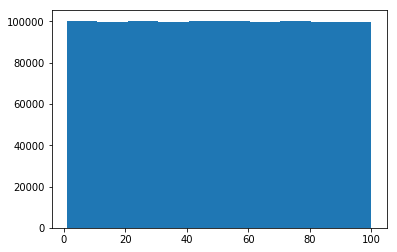

In [22]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [39]:
data = np.random.randn(1000000)

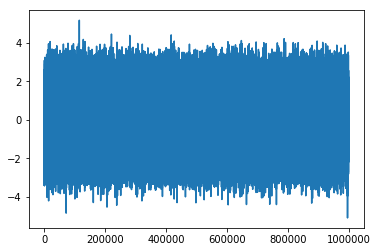

In [41]:
x = range(1,1000001)
plt.plot(x, data)

[]

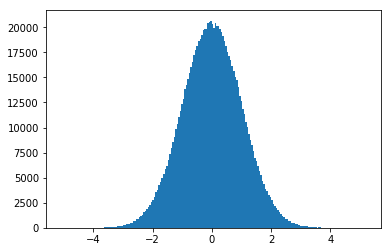

In [49]:
%matplotlib inline
plt.hist(data, bins=200)
plt.plot()

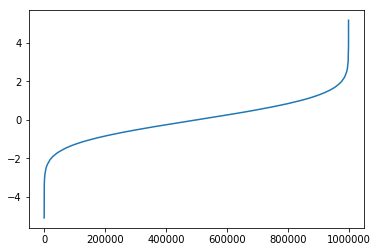

In [50]:
plt.plot(x,sorted(data))

## Generar una campana de gaus con el centro que no sea 0 y la standar deviation no sea 1

(array([  13.,  104.,  451., 1418., 2529., 2790., 1757.,  742.,  161.,
          35.]),
 array([-3.89877211, -2.07791353, -0.25705496,  1.56380362,  3.38466219,
         5.20552077,  7.02637934,  8.84723792, 10.66809649, 12.48895507,
        14.30981364]),
 <a list of 10 Patch objects>)

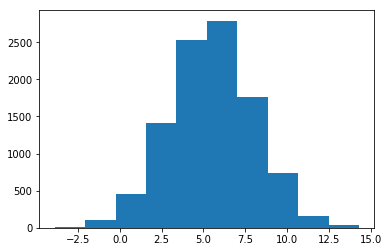

In [53]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [54]:
data = np.random.randn(2,4)
data

array([[ 0.13145223, -0.20118348, -3.5959827 , -1.46346636],
       [-0.61693479, -0.13488791,  0.06427103, -0.74035648]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [64]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.14162886


(3.14162886, [<matplotlib.lines.Line2D at 0x19a4e98e6a0>])

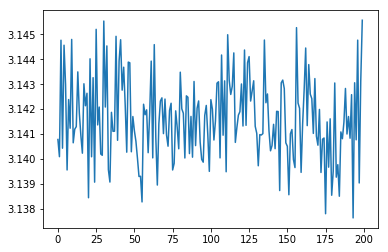

In [72]:
pi_montecarlo(1000000, 200)

### Dummy Data Sets
### Generar dummys con diferentes tipos de distribucion

In [84]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [85]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000013,1.503061,18.502605
std,1.001444,2.499280,7.795461
min,-5.278086,-11.704222,5.000069
25%,-0.674822,-0.186219,11.747778
50%,-0.000504,1.501674,18.506053
75%,0.674623,3.189589,25.254795
max,4.690342,14.677491,31.999970


(array([1.40000e+01, 5.16000e+02, 1.05920e+04, 8.78400e+04, 2.85629e+05,
        3.74199e+05, 1.96414e+05, 4.12610e+04, 3.43400e+03, 1.01000e+02]),
 array([-5.27808557, -4.28124282, -3.28440007, -2.28755732, -1.29071458,
        -0.29387183,  0.70297092,  1.69981366,  2.69665641,  3.69349916,
         4.6903419 ]),
 <a list of 10 Patch objects>)

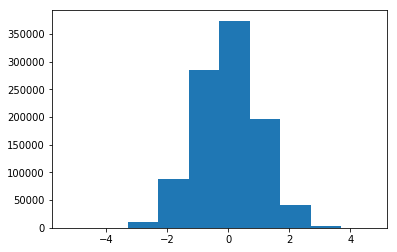

In [86]:
plt.hist(data["A"])

(array([1.00000e+01, 7.37000e+02, 1.61800e+04, 1.27288e+05, 3.53377e+05,
        3.55271e+05, 1.29242e+05, 1.71250e+04, 7.59000e+02, 1.10000e+01]),
 array([-11.70422208,  -9.06605077,  -6.42787946,  -3.78970815,
         -1.15153685,   1.48663446,   4.12480577,   6.76297708,
          9.40114839,  12.0393197 ,  14.67749101]),
 <a list of 10 Patch objects>)

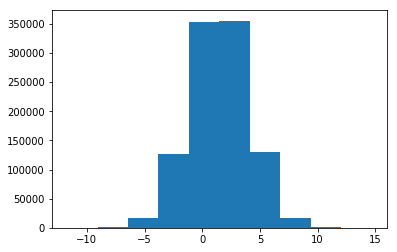

In [87]:
plt.hist(data["B"])

(array([100149.,  99881.,  99930.,  99599., 100228., 100069., 100292.,
         99589., 100058., 100205.]),
 array([ 5.00006859,  7.70005868, 10.40004878, 13.10003888, 15.80002898,
        18.50001908, 21.20000917, 23.89999927, 26.59998937, 29.29997947,
        31.99996957]),
 <a list of 10 Patch objects>)

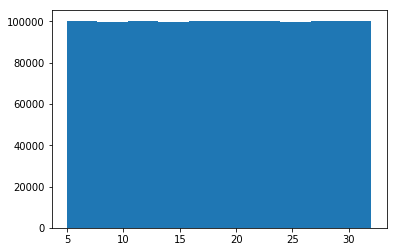

In [88]:
plt.hist(data["C"])

In [90]:
data = pd.read_csv("C:/Users/Guany/Documents/GitHub/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [92]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [93]:
colum_names = data.columns.values.tolist()

In [94]:
a = len(colum_names)
a

21

In [97]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a) # indexa desde el 42 en adelante. Util para empalmar dos DataFrames
)

In [98]:
new_data

,A,B,Column Name
42,1.952173,0.484205,State
43,1.508091,0.523625,Account Length
44,1.673510,0.897139,Area Code
45,-0.680445,0.598945,Phone
46,-0.806879,0.146422,Int'l Plan
47,1.062671,0.044985,VMail Plan
48,-1.158041,0.680984,VMail Message
49,0.975061,0.597450,Day Mins
50,-0.089371,0.287283,Day Calls
51,0.949543,0.851220,Day Charge
